In [1]:
import pandas as pd
import numpy as np
import requests

from wordcloud import WordCloud 

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
PATH_HASTAGS = '../data/hashtags_by_user.csv'
PATH_MEMBERS = '../data/members_info.csv'
PATH_COMMITTEE = '../data/committees_info.csv'

In [3]:
hashtags = pd.read_csv(PATH_HASTAGS)
hashtags = hashtags.drop(['party'], axis=1)
members = pd.read_csv(PATH_MEMBERS)
committees = pd.read_csv(PATH_COMMITTEE)

In [4]:
data = members.merge(committees, how='inner', left_on=['id'], right_on=['member_id'])
all_data = data.merge(hashtags, how='inner', left_on=['twitter_account'], right_on=['screen_name'])

## Basic statistics of each committee

In [5]:
size = pd.DataFrame(data.groupby('committee_name').size().sort_values(0, ascending=False)).reset_index()
data['%men'] = data['gender'] == 'M'
stats = data.groupby('committee_name').mean()[['dw_nominate', 'seniority', 'total_present', '%men']].reset_index()
size.merge(stats)

,committee_name,0,dw_nominate,seniority,total_present,%men
0,Committee on Appropriations,30,0.027700,12.833333,0.500000,0.766667
1,Committee on Armed Services,28,0.135815,7.142857,0.428571,0.750000
2,"Committee on Commerce, Science, and Transporta...",28,0.072821,7.250000,0.464286,0.714286
3,Committee on Finance,27,0.105407,14.703704,0.518519,0.888889
4,"Committee on Banking, Housing, and Urban Affairs",25,0.115800,7.600000,0.360000,0.880000
5,"Committee on Health, Education, Labor, and Pen...",24,0.040500,11.166667,0.458333,0.708333
6,Committee on the Budget,23,0.083217,10.869565,0.521739,0.869565
7,Committee on Energy and Natural Resources,23,0.103435,8.000000,0.478261,0.652174
8,Committee on Environment and Public Works,22,-0.001227,8.636364,0.500000,0.727273
9,"Committee on Agriculture, Nutrition, and Forestry",21,0.055476,12.142857,0.476190,0.666667


## Word Cloud for each committeee 

for each senator was extracted the top 100 hashtags (or less if they aren't so active in twitter), this data was merged with committees members and the word cloud is below:

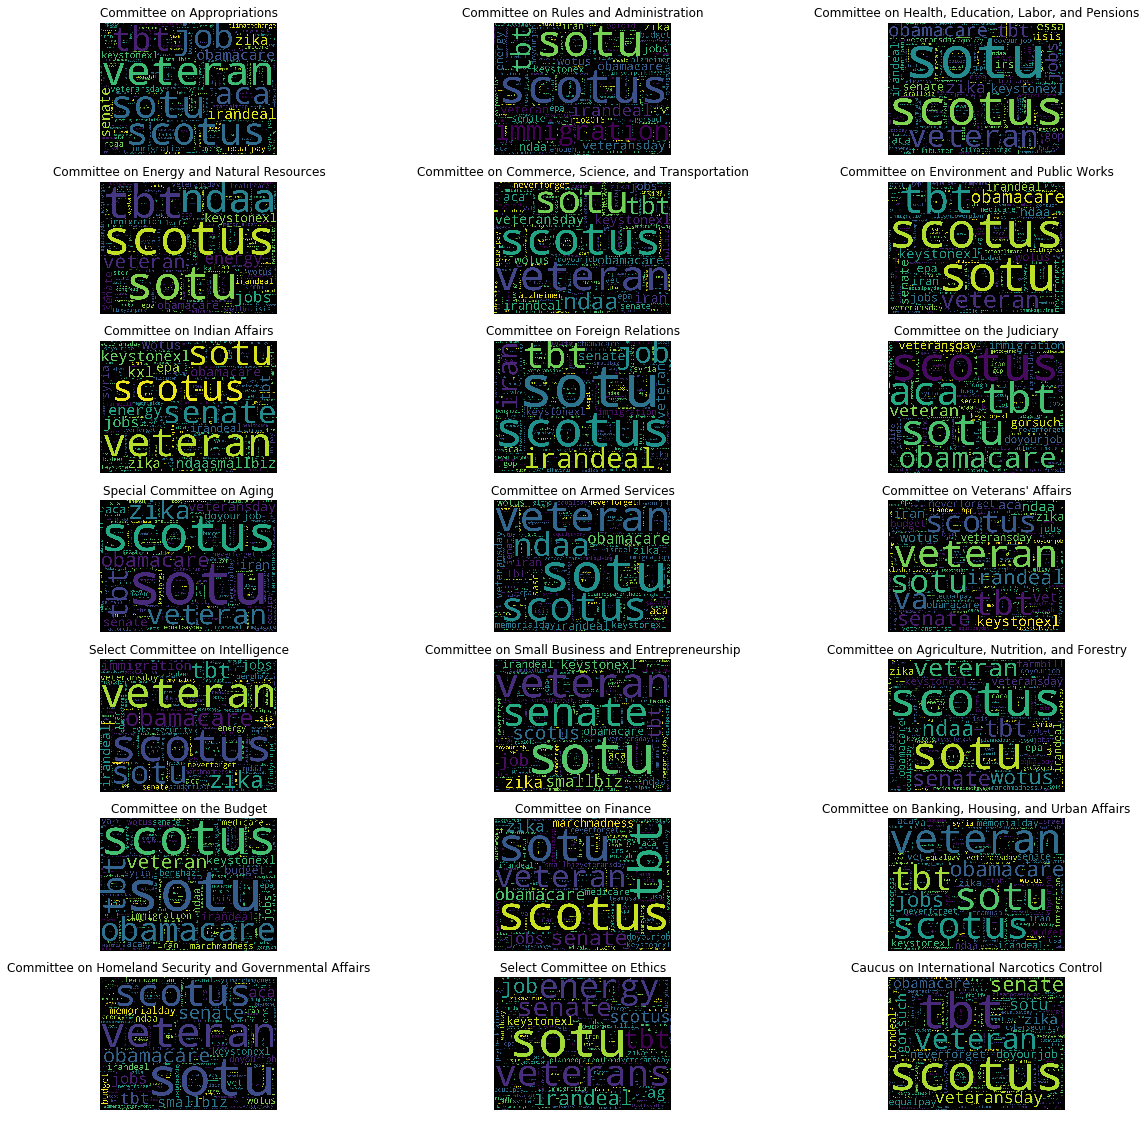

In [6]:
f, ax = plt.subplots(7, 3, figsize=(20, 20))
positions = np.array(range(21)).reshape(7, 3)

for num_c, c in enumerate(all_data.committee_name.unique()):
    pos = np.where(positions==num_c)
    d = all_data[all_data['committee_name'] == c]
    all_hashtags = ' '.join(list(d['hashtag']))
    
    cloud = WordCloud(width=1440, height=1080).generate(all_hashtags);
    ax[pos[0][0], pos[1][0]].imshow(cloud);
    ax[pos[0][0], pos[1][0]].set_title('{c}'.format(c=c), fontsize=12)
    ax[pos[0][0], pos[1][0]].axis('off')

Removing hashtags `sotu`, `scotus`, `veteran`, `veterans`

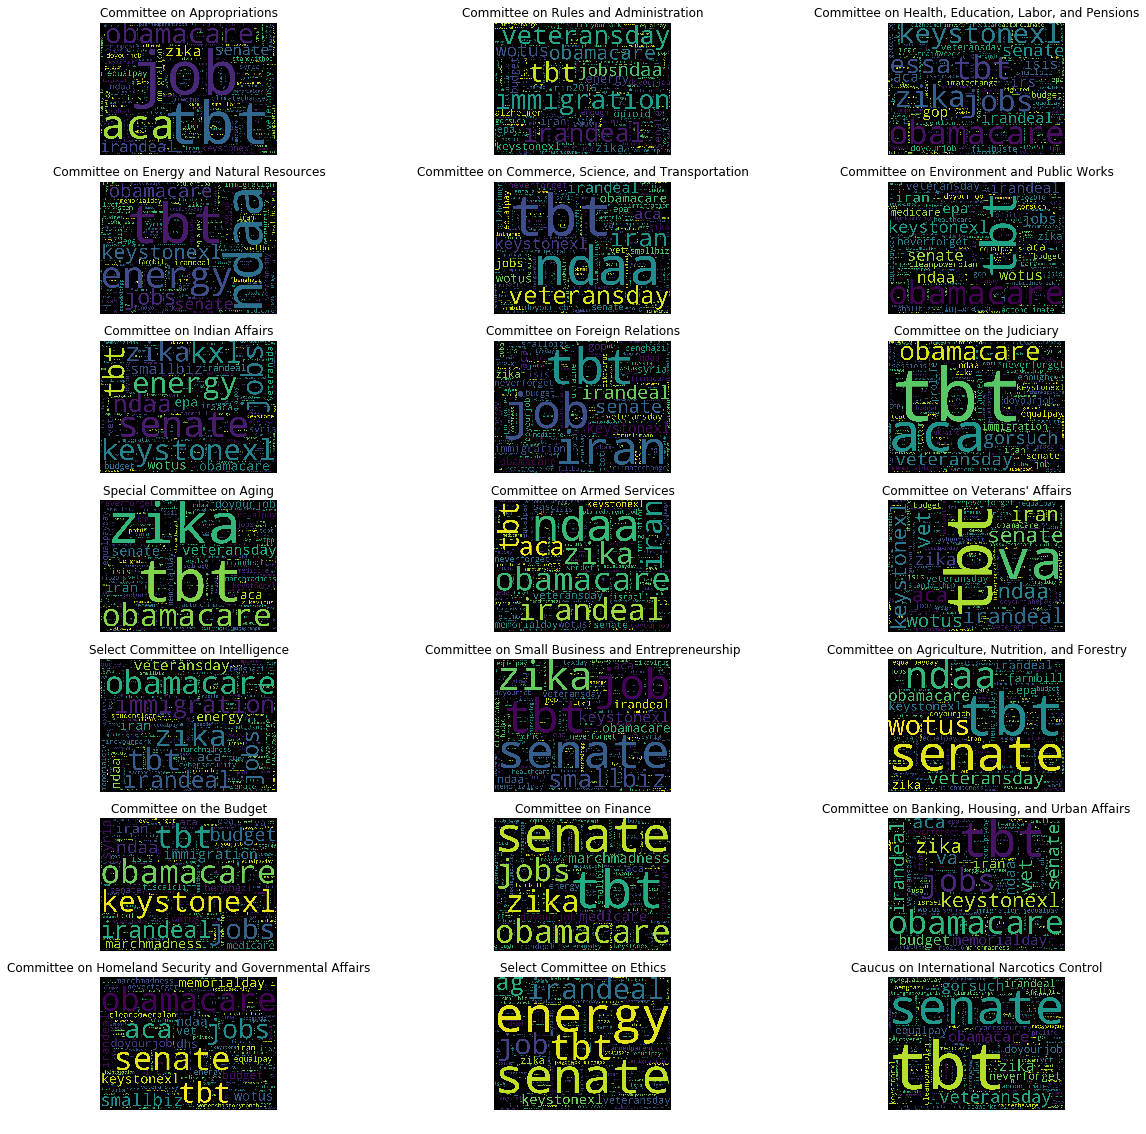

In [7]:
f, ax = plt.subplots(7, 3, figsize=(20, 20))
positions = np.array(range(21)).reshape(7, 3)

to_remove = ['sotu', 'scotus', 'veteran', 'veterans']

for num_c, c in enumerate(all_data.committee_name.unique()):
    pos = np.where(positions==num_c)
    d = all_data[all_data['committee_name'] == c]
    d = d[d.hashtag.apply(lambda x: x not in to_remove)]
    all_hashtags = ' '.join(list(d['hashtag']))
    
    cloud = WordCloud(width=1440, height=1080).generate(all_hashtags);
    ax[pos[0][0], pos[1][0]].imshow(cloud);
    ax[pos[0][0], pos[1][0]].set_title('{c}'.format(c=c), fontsize=12)
    ax[pos[0][0], pos[1][0]].axis('off')